In [40]:
from iminuit import Minuit
import matplotlib.pyplot as plt
#import matplotlib; matplotlib.use('Agg')
from matplotlib import transforms
from matplotlib import rc
from IPython.display import Image
import numpy as np
from astropy.io import fits as pyfits
from astropy.io import fits
from scipy.ndimage import gaussian_filter
import scipy
from scipy.optimize import minimize, rosen, rosen_der
from scipy.special import factorial
import scipy.integrate as integrate
from scipy.integrate import quad
from itertools import starmap
from scipy import optimize
import corner
import time
from mpl_toolkits import mplot3d
import healpy as hp
from scipy import nan
import dark_matter_jfactors_test as dmj
import math
import random
import importlib
from pymultinest.solve import solve
import pymultinest
import warnings
warnings.filterwarnings("ignore")
import scipy as sp
import scipy.interpolate
import json
from os import walk
import re
import acceptance_psf_eastrogam as aaa
import photon_spectrum
import evaporating_black_hole_template as dm_template


In [41]:
importlib.reload(photon_spectrum)

<module 'photon_spectrum' from '/Users/ckeith/Documents/uchicago_astro/cosmo/fermi_galactic_excess/testing2/FITS_files_For_Tim/photon_spectrum.py'>

In [103]:
energiesforBH = np.logspace(np.log10(.1), np.log10(1e6), num = 1000)
egamma_values = fits.open('egammavals.fits')[0].data
lum3e15 = (photon_spectrum.get_integral(egamma_values, mass_bh = 3e15)[1])
lum3e16 = (photon_spectrum.get_integral(egamma_values, mass_bh = 9.48683298e+15)[1]) #units of photons per MeV per sec per BH
lum3e17 = (photon_spectrum.get_integral(egamma_values, mass_bh = 3.00000000e+16)[1])
lum3e18 = (photon_spectrum.get_integral(egamma_values, mass_bh = 9.48683298e+16)[1])
lum3e19 = (photon_spectrum.get_integral(egamma_values, mass_bh = 3.00000000e+17)[1])

return_for_paper = False

lum3e15ind = (photon_spectrum.get_integral(egamma_values, mass_bh = 3e15, return_for_paper = True)) #units of photons per MeV per sec per BH
lum3e16ind = (photon_spectrum.get_integral(egamma_values, mass_bh = 9.48683298e+15, return_for_paper = True)) #units of photons per MeV per sec per BH
lum3e17ind = (photon_spectrum.get_integral(egamma_values, mass_bh = 3.00000000e+16, return_for_paper = True))
lum3e18ind = (photon_spectrum.get_integral(egamma_values, mass_bh = 9.48683298e+16, return_for_paper = True)[1])
lum3e19ind = (photon_spectrum.get_integral(egamma_values, mass_bh = 3e18, return_for_paper = True)[1])



In [43]:
energiesforBH = np.logspace(np.log10(.1), np.log10(1e6), num = 1000)

lover_colors = np.asarray([
    [253,210,186],
    [247,173,222],
    [83,182,245],
    [151,110,103],
    [179,184,221],
])/256


In [100]:
print(np.logspace(np.log10(3e15), np.log10(3e17), num = 5))

[3.00000000e+15 9.48683298e+15 3.00000000e+16 9.48683298e+16
 3.00000000e+17]


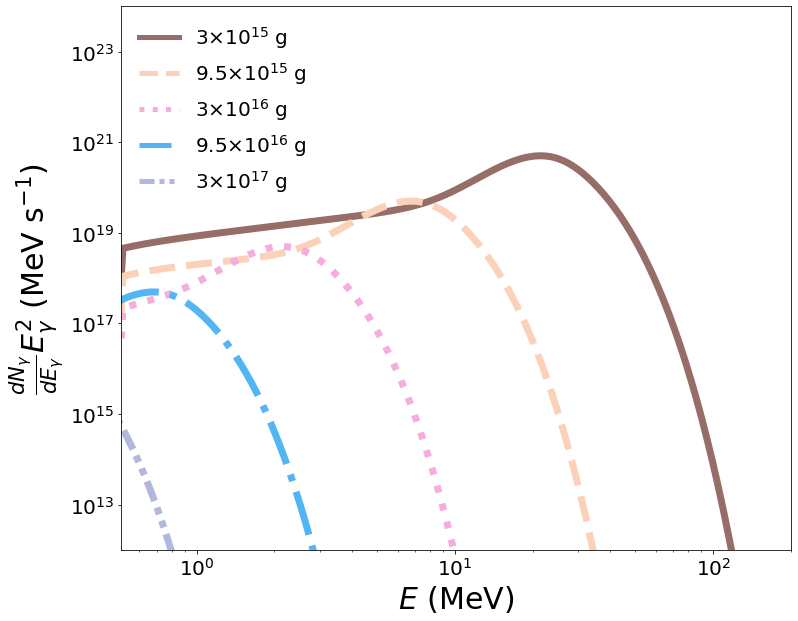

In [135]:
axisfontsize=30
ticksize=20
legendsize = 24
width = 7
dummywidth = 5


plt.close()

fig, ax = plt.subplots(figsize=(12, 10))
#plt.plot(energiesforBH, lum3e18*energiesforBH**2, color = lover_colors[-3], linewidth = width, label = '3e18 g', ls = '-.')
ax.plot(energiesforBH, lum3e15*energiesforBH**2, color = lover_colors[3], linewidth = width)
ax.plot(0, 0, color = lover_colors[3], linewidth = dummywidth, label = r'3$\times 10^{15}$ g')


ax.plot(energiesforBH, lum3e16*energiesforBH**2, color = lover_colors[0], linewidth = width, ls = '--')
ax.plot(0, 0, color = lover_colors[0], linewidth = dummywidth, label = r'9.5$\times 10^{15}$ g', ls = '--')

ax.plot(energiesforBH, lum3e17*energiesforBH**2, color = lover_colors[1], linewidth = width, ls = ':')
ax.plot(0, 0, color = lover_colors[1], linewidth = dummywidth, label = r'3$\times 10^{16}$ g', ls = ':')

ax.plot(energiesforBH, lum3e18*energiesforBH**2, color = lover_colors[2], linewidth = width, ls = '-.')
ax.plot(0, 0, color = lover_colors[2], linewidth = dummywidth, label = r'9.5$\times 10^{16}$ g', ls = '-.')


ax.plot(energiesforBH, lum3e19*energiesforBH**2, color = lover_colors[4], linewidth = width, ls = (0, (3, 1, 1, 1, 1, 1)))
ax.plot(0, 0, color = lover_colors[4], linewidth = dummywidth, label = r'3$\times 10^{17}$ g', ls = (0, (3, 1, 1, 1, 1, 1)))

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e12, 1e24)
plt.xlim(.511, 2e2)
ax.set_ylabel(r'$\frac{dN_{\gamma}}{dE_{\gamma}}E_{\gamma}^{2}$ (MeV s$^{-1}$)', fontsize = axisfontsize)
ax.set_xlabel('$E$ (MeV)', fontsize = axisfontsize)
leg = ax.legend(prop={'size': 20}, frameon=False, loc = 'upper left')
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.savefig('./paper_images/blackhole_threespectra.pdf')
#plt.axvline(x=central_energies1[index_cut])
#plt.axvline(x=.1, color = 'black')


In [132]:
print(np.where(lum3e15ind[0] <= .511))
finIA = np.copy(lum3e15ind[1])
finIA[np.where(lum3e15ind[0] <= .511)] = np.nan


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),)


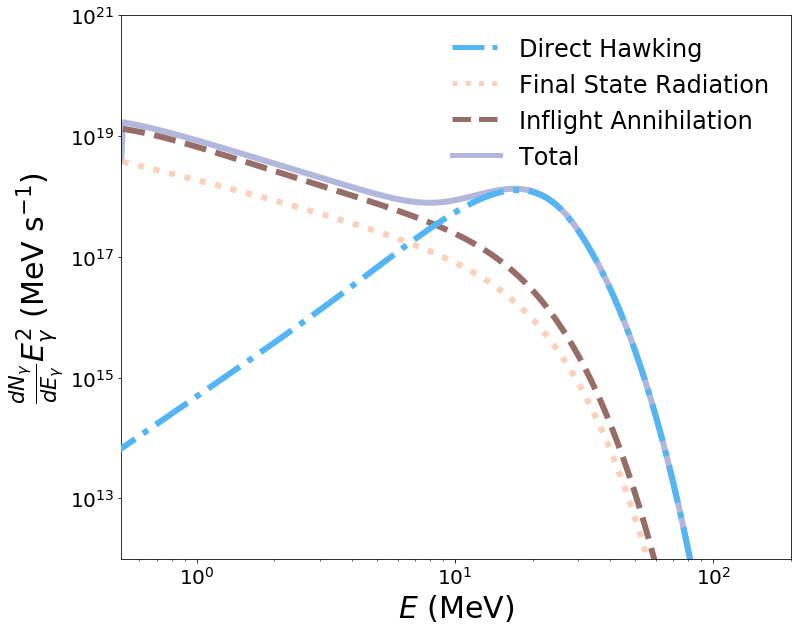

In [134]:


plt.close()
width = 6
fig, ax = plt.subplots(figsize=(12, 10))
#plt.plot(energiesforBH, lum3e18*energiesforBH**2, color = lover_colors[-3], linewidth = width, label = '3e18 g', ls = '-.')
ax.plot(lum3e15ind[0], lum3e15ind[2], color = lover_colors[2], linewidth = width, ls = '-.', zorder = 3)
ax.plot(0, 0, color = lover_colors[2], linewidth = dummywidth, label = r'Direct Hawking', ls = '-.')

ax.plot(lum3e15ind[0], lum3e15ind[3], color = lover_colors[0], linewidth = width, ls = ':', zorder = 2)
ax.plot(0, 0, color = lover_colors[0], linewidth = dummywidth, label = r'Final State Radiation', ls = ':')

ax.plot(lum3e15ind[0], finIA, color = lover_colors[3], linewidth = width,  ls = '--', zorder = 1)
ax.plot(0, 0, color = lover_colors[3], linewidth = dummywidth, label = r'Inflight Annihilation', ls = '--')

ax.plot(lum3e15ind[0], lum3e15, color = lover_colors[4], linewidth = width, zorder = 0)
ax.plot(0, 0, color = lover_colors[4], linewidth = dummywidth, label = r'Total')

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e12, 1e21)
plt.xlim(.511, 2e2)
ax.set_ylabel(r'$\frac{dN_{\gamma}}{dE_{\gamma}}E_{\gamma}^{2}$ (MeV s$^{-1}$)', fontsize = axisfontsize)
ax.set_xlabel('$E$ (MeV)', fontsize = axisfontsize)
leg = ax.legend(prop={'size': legendsize}, frameon=False)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.savefig('./paper_images/blackhole_components.pdf')
#plt.axvline(x=central_energies1[index_cut])
#plt.axvline(x=.1, color = 'black')


In [71]:
angres_amegofile = 'angres.csv'
effarea_amegofile = 'effective_area.csv'

angres1 = np.loadtxt(angres_amegofile, delimiter = ',', skiprows = 2, usecols = [0, 1], dtype = float, max_rows=4).T
angres2 = np.loadtxt(angres_amegofile, delimiter = ',', skiprows = 2, usecols = [2, 3], dtype = float, max_rows=6).T
angres3 = np.loadtxt(angres_amegofile, delimiter = ',', skiprows = 2, usecols = [4, 5], dtype = float, max_rows=13).T


print(angres1)
print(angres2)
print(angres3)


[[ 0.28304263  0.46443196  0.96056937  1.52616515]
 [11.04        4.90666667  2.53333333  2.05333333]]
[[0.47258807 0.99016783 1.5485889  3.05496603 5.00804179 9.67714228]
 [6.93333333 3.09333333 2.4        1.38666667 1.36       2.69333333]]
[[7.87490296e+00 9.27590563e+00 1.46099519e+01 3.02101761e+01
  4.94656772e+01 9.77668383e+01 1.52688340e+02 3.16395199e+02
  5.01393615e+02 9.99647176e+02 1.55607545e+03 3.26874158e+03
  4.98511988e+03]
 [1.20533333e+01 1.14933333e+01 1.00000000e+01 5.65333333e+00
  3.76000000e+00 2.53333333e+00 2.00000000e+00 1.41333333e+00
  1.22666667e+00 1.01333333e+00 8.53333333e-01 7.20000000e-01
  8.80000000e-01]]


In [76]:
###### eastrogam and AMEGO PSF and exposure
import acceptance_psf_eastrogam as aaa
importlib.reload(aaa)
acceptance_interp = aaa.get_acceptance_interp() #put in the energy in MeV!
angle_interp = aaa.get_angle_interp()


energieshere = np.logspace(np.log10(.1), np.log10(1e6), num = 10000)
acceptance = acceptance_interp(energieshere)
angle = angle_interp(energieshere)



energies_low = [.3, .5, 1, 2, 5, 10]
energies_high = [10.001, 30, 50, 70, 100, 300, 500, 700, 1000, 3000]
effective_area_low = list(np.array([560, 446, 297, 117, 105, 50])*0.2*4*np.pi) #in cm^2*str
effective_area_high = list(np.array([215, 846, 1220, 1245, 1310, 1379, 1493, 1552, 1590, 1810])*.2*4*np.pi) #in cm^2*str



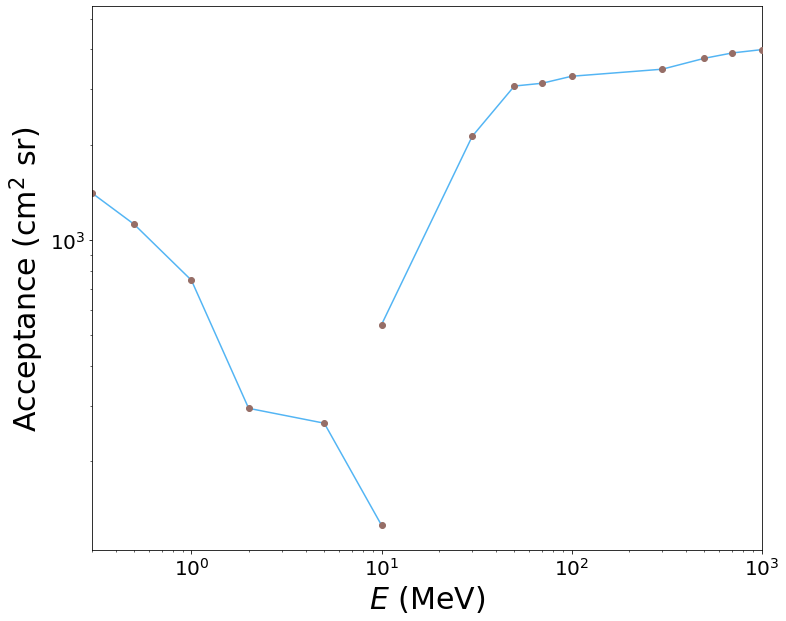

In [146]:
plt.close()
dotsize = 100
fig, ax = plt.subplots(figsize=(12, 10))

plt.scatter(energies_low, effective_area_low, color = lover_colors[3], zorder = 1)
plt.plot(energies_low, effective_area_low, color = lover_colors[2], zorder = 0)


plt.plot(energies_high, effective_area_high, color = lover_colors[2], zorder = 3)
plt.scatter(energies_high, effective_area_high, color = lover_colors[3], zorder = 4)


'''
plt.plot(angres1[0], angres1[1]*2.5, color = lover_colors[1])
plt.scatter(angres1[0], angres1[1]*2.5, color = lover_colors[1])

plt.plot(angres2[0], angres2[1]*2.5, color = lover_colors[1])
plt.scatter(angres2[0], angres2[1]*2.5, color = lover_colors[1])

plt.plot(angres3[0], angres3[1]*2.5, color = lover_colors[1])
plt.scatter(angres3[0], angres3[1]*2.5, color = lover_colors[1])
'''

#plt.scatter(0, 0, color = lover_colors[0], linestyle = '-.', label = 'e-ASTROGAM', s = dotsize)
#plt.scatter(0, 0, color = lover_colors[1], label = 'AMEGO', s = dotsize)

plt.yscale('log')
plt.xscale('log')
plt.xlim(3e-1, 1e3)
ax.set_ylabel(r'Acceptance (cm$^2$ sr)', fontsize = axisfontsize)
ax.set_xlabel('$E$ (MeV)', fontsize = axisfontsize)
#leg = ax.legend(prop={'size': legendsize})
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.savefig('./paper_images/acceptances.pdf')



In [83]:
energies_low = [.3, .5, 1, 2, 5, 10]
energies_high = [10.001, 30, 50, 70, 100, 300, 500, 700, 1000, 3000] #in MeV
psf_low = [4.3, 2.5, 1.5, 1.1, 0.8, 0.8] #in degrees
psf_high = [9.5, 5.4, 2.7, 1.8, 1.3, 0.51, 0.3, 0.23, .15, .10]

eff1 = np.loadtxt(effarea_amegofile, delimiter = ',', skiprows = 2, usecols = [0, 1], dtype = float, max_rows=5).T
eff2 = np.loadtxt(effarea_amegofile, delimiter = ',', skiprows = 2, usecols = [2, 3], dtype = float, max_rows=8).T
eff3 = np.loadtxt(effarea_amegofile, delimiter = ',', skiprows = 2, usecols = [4, 5], dtype = float, max_rows=13).T


In [84]:
print(eff1)
print(eff2)
print(eff3)

[[1.56513281e-01 2.96780246e-01 4.71284046e-01 9.57495456e-01
  1.52827171e+00]
 [1.29357082e+01 1.42313288e+03 2.75736926e+03 3.13267366e+03
  3.07909159e+03]]
[[3.79124342e-01 4.87532992e-01 9.60233128e-01 1.49939674e+00
  3.04369544e+00 4.78166660e+00 9.44019299e+00 1.56649618e+01]
 [1.02126168e+00 3.03784603e+01 2.14289047e+02 3.89221096e+02
  4.95153972e+02 4.00915919e+02 2.06368309e+02 1.15211791e+02]]
[[   5.0497574     9.61439404   15.02010096   29.91211272   47.6562073
    93.42448689  146.48548325  302.99211224  475.30922924  934.62329777
  1492.49028912 2991.81702641 4783.40975615]
 [  28.32178945  181.33601951  308.75201965  500.53713121  626.91514611
   823.80262003  863.81129624  905.17630987  889.72997103  780.6043095
   719.22989124  487.23691867  381.9445338 ]]


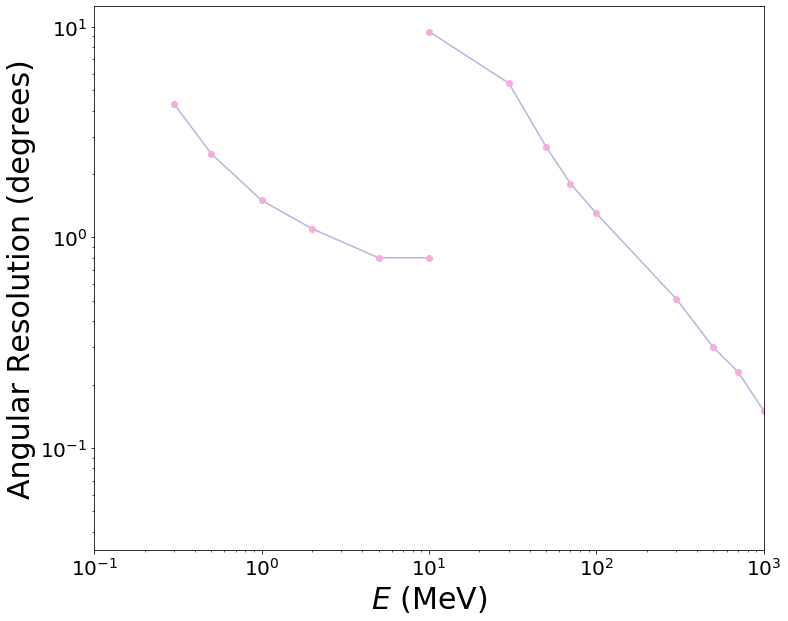

In [149]:
plt.close()
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(energies_low, psf_low, color = lover_colors[4], zorder = 0)
plt.scatter(energies_low, psf_low, color = lover_colors[1])

plt.plot(energies_high, psf_high, color = lover_colors[4], zorder = 0)
plt.scatter(energies_high, psf_high, color = lover_colors[1])

'''
plt.plot(eff1[0], eff1[1], color = lover_colors[3])
plt.scatter(eff1[0], eff1[1], color = lover_colors[3])

plt.plot(eff2[0], eff2[1], color = lover_colors[3])
plt.scatter(eff2[0], eff2[1], color = lover_colors[3])

plt.plot(eff3[0], eff3[1], color = lover_colors[3])
plt.scatter(eff3[0], eff3[1], color = lover_colors[3])



plt.scatter(0, 0, color = lover_colors[2], label = 'e-ASTROGAM', s = dotsize)
plt.scatter(0, 0, color = lover_colors[3], label = 'AMEGO', s = dotsize)
'''

plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-1, 1e3)
ax.set_ylabel(r'Angular Resolution (degrees)', fontsize = axisfontsize)
ax.set_xlabel('$E$ (MeV)', fontsize = axisfontsize)
#leg = ax.legend(prop={'size': legendsize})
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.savefig('./paper_images/PSFangle.pdf')



In [336]:
#set of templates
import mimimize_fbh_forplots as templates
importlib.reload(templates)

<module 'mimimize_fbh_forplots' from '/Users/ckeith/Documents/uchicago_astro/cosmo/fermi_galactic_excess/testing2/FITS_files_For_Tim/mimimize_fbh_forplots.py'>

In [378]:
tests = templates.get_templates(1e-4, 'ktests511.fits',dmfilename = 'yield_DS_keith40.dat', massdm = 40, blackholem = 2e16, gam = 1.6)


-----------
gamma for BHs: 1.6
mass for BHs: 2e+16
-------------------------
energy/bin at 10 MeV:8.912509380762168
11
energy here: 8.912509380762168
11 8.912509380762168
yield_DS_keith40.dat
gamma  1.6


In [379]:
filelist1 = ['Bremss_00320087_E_50-814008_MeV_healpix_128.fits', 'Bremss_SL_Z6_R20_T100000_C5_E_50-814008_MeV_healpix_128.fits', 'pi0_Model_A_E_50-814008_MeV_healpix_128.fits', 'pi0_Model_F_E_50-814008_MeV_healpix_128.fits', 'ICS_Model_A_E_50-814008_MeV_healpix_128.fits', 'ICS_Model_F_E_50-814008_MeV_healpix_128.fits']


In [380]:
import matplotlib.colors as mcolors
def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('lover_cmp', segmentdata=cdict, N=256)
    return cmp

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

lover_colorshmap = ['#f7adde','#53b7f5','#fdd1ba', '#976e67', '#b3b8dd', ]
#000000


In [461]:
def make_maps(templ, colorsmap):    


    #hp.mollview(data)
    
    images = []
    
    for t in templ:
        img = hp.cartview(np.log10(list(t)), cmap = get_continuous_cmap(lover_colorshmap, float_list=None), lonra = [-20, 20], latra = [-20, 20], notext = True, return_projected_map = True)
        plt.close()
        images.append(img)
    
    fig, axes = plt.subplots(figsize=(16, 10), nrows=2, ncols=3)
    count = 0
    for ax in axes.flat:
        im = ax.imshow((images[count]), cmap = get_continuous_cmap(lover_colorshmap, float_list=None), extent=[-20,20,-20,20], aspect='auto')
        count += 1
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.83, 0.15, 0.03, 0.7])
    fig.colorbar(im, cax=cbar_ax, cmap = get_continuous_cmap(lover_colorshmap, float_list=None))
    plt.show()


In [462]:
print(np.log10(tests[0]))

[-2.74589299 -2.724059   -2.72310979 ... -2.57067186 -2.55195859
 -2.5620608 ]


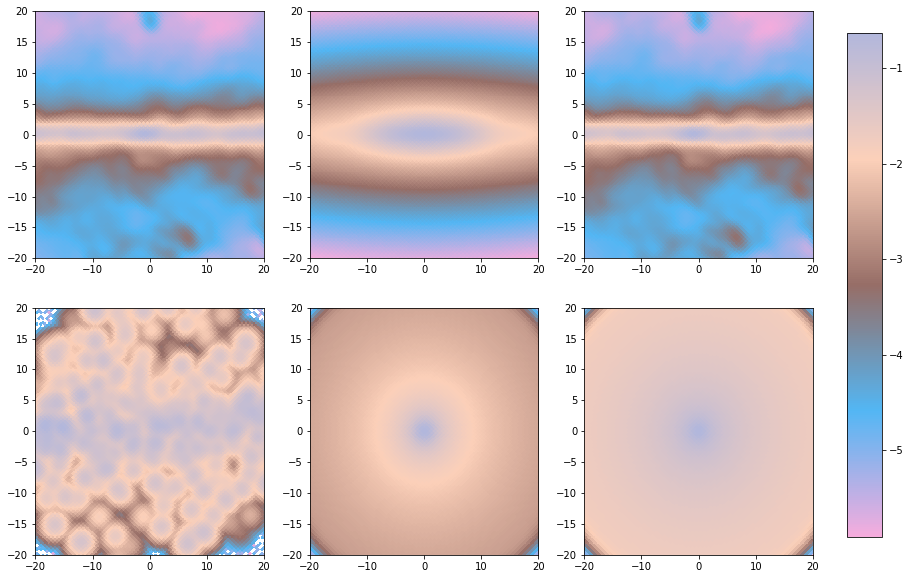

In [463]:
lover_colorshmap = ['#f7adde','#53b7f5', '#976e67', '#fdd1ba',  '#b3b8dd' ,]

templateshere = [tests[0], tests[1], tests[2], tests[3], tests[5], tests[6]]

make_maps(templateshere, colormap)

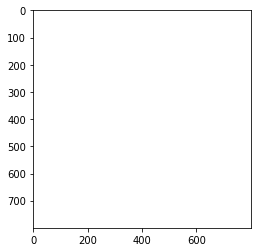

In [408]:
img = hp.cartview(np.log10(list(t)), cmap = get_continuous_cmap(lover_colorshmap, float_list=None), lonra = [-20, 20], latra = [-20, 20], notext = True, return_projected_map = True)
plt.close()
plt.imshow(np.log10(img), cmap = get_continuous_cmap(lover_colorshmap, float_list=None))


In [221]:
print(colormap)

In [507]:
gamma1_511 = fits.open('./saved_data/511_gamma_1.fits')[0].data
gamma12_511 = fits.open('./saved_data/511_gamma_12.fits')[0].data
gamma14_511 = fits.open('./saved_data/511_gamma_14.fits')[0].data


In [268]:
#masses = [3000000000000001.0, 3634582975885771.5, 4403397802866204.5, 5334838230116770.0, 6463304070095662.0, 7830471647047603.0, 9486832980505142.0, 1.1493560548671836e+16, 1.392476650083838e+16, 1.6870239755710478e+16, 2.043876207173879e+16, 2.4762125558040628e+16, 3.0000000000000012e+16, 3.634582975885757e+16, 4.403397802866222e+16, 5.3348382301167704e+16, 6.463304070095636e+16, 7.830471647047635e+16, 9.486832980505141e+16, 1.1493560548671837e+17, 1.3924766500838379e+17, 1.687023975571048e+17, 2.043876207173879e+17, 2.476212555804063e+17, 3.000000000000001e+17]
#fpbhs = [1.362521797281927e-06, 1.9855965866841513e-06, 2.495575927519895e-06, 2.7954585748130458e-06, 4.213883620703235e-06, 6.450090091055426e-06, 1.0784972730286309e-05, 1.2840067847034949e-05, 1.624618107664236e-05, 3.3617618303078333e-05, 3.7445247704192645e-05, 3.563923781839444e-05, 4.585582113273218e-05, 6.306263420241412e-05, 8.692330987386712e-05, 0.00012014462642450265, 0.00016500574370490728, 0.00023565012939774185, 0.000367182927869291, 0.0007276450582113597, 0.0019562499588200943, 0.007615000255047067, 0.04249841046174959, 0.35437657880977486, 4.796555996424815]


In [502]:
#print(list(gamma12_511[0]))
#print(list(gamma12_511[1]))

print(list(gamma14_511[0]))
print(list(gamma14_511[1]))

masses = [3000000000000001.0, 3634582975885771.5, 4403397802866204.5, 5334838230116770.0, 6463304070095662.0, 7830471647047603.0, 9486832980505142.0, 1.1493560548671836e+16, 1.392476650083838e+16, 1.6870239755710478e+16, 2.043876207173879e+16, 2.4762125558040628e+16, 3.0000000000000012e+16, 3.634582975885757e+16, 4.403397802866222e+16, 5.3348382301167704e+16, 6.463304070095636e+16, 7.830471647047635e+16, 9.486832980505141e+16, 1.1493560548671837e+17, 1.3924766500838379e+17, 1.687023975571048e+17, 2.043876207173879e+17, 2.476212555804063e+17, 3.000000000000001e+17]
fpbhs = [1.362521797281927e-06, 1.9855965866841513e-06, 2.495575927519895e-06, 2.7954585748130458e-06, 4.213883620703235e-06, 6.450090091055426e-06, 1.0784972730286309e-05, 1.5e-5, 2.2e-05, 3.3617618303078333e-05, 3.7445247704192645e-05, 3.563923781839444e-05, 4.585582113273218e-05, 6.306263420241412e-05, 8.692330987386712e-05, 0.00012014462642450265, 0.00016500574370490728, 0.00023565012939774185, 0.000367182927869291, 0.0007276450582113597, 0.0019562499588200943, 0.007615000255047067, 0.04249841046174959, 0.35437657880977486, 4.796555996424815]

#masses = [3000000000000001.0, 3634582975885771.5, 4403397802866204.5, 5334838230116770.0, 6463304070095662.0, 7830471647047603.0, 9486832980505142.0, 1.1493560548671836e+16, 1.392476650083838e+16, 1.6870239755710478e+16, 2.043876207173879e+16, 2.4762125558040628e+16, 3.0000000000000012e+16, 3.634582975885757e+16, 4.403397802866222e+16, 5.3348382301167704e+16, 6.463304070095636e+16, 7.830471647047635e+16, 9.486832980505141e+16, 1.1493560548671837e+17, 1.3924766500838379e+17, 1.687023975571048e+17, 2.043876207173879e+17, 2.476212555804063e+17, 3.000000000000001e+17]
#fpbhs = [1.9942449977102096e-06, 2.677865181986946e-06, 3.3195917243874142e-06, 3.937271582406169e-06, 5.967637107201319e-06, 9.737293283239896e-06, 1.5390829445314234e-05, 2.3261101460042356e-05, 3.6017219677585846e-05, 4.321111708890545e-05, 5.122668173378227e-05, 5.817162569980416e-05, 7.092010258803546e-05, 9.602176541319875e-05, 0.00012955443495759762, 0.00017859063734612164, 0.0002506648631462537, 0.00038230320518376675, 0.0006402421509067235, 0.0013606810792525764, 0.0037951653067113717, 0.015083591221278192, 0.08530890339255336, 0.7172970137133287, 9.75626578070231]


[3000000000000001.0, 3634582975885771.5, 4403397802866204.5, 5334838230116770.0, 6463304070095662.0, 7830471647047603.0, 9486832980505142.0, 1.1493560548671836e+16, 1.392476650083838e+16, 1.6870239755710478e+16, 2.043876207173879e+16, 2.4762125558040628e+16, 3.0000000000000012e+16, 3.634582975885757e+16, 4.403397802866222e+16, 5.3348382301167704e+16, 6.463304070095636e+16, 7.830471647047635e+16, 9.486832980505141e+16, 1.1493560548671837e+17, 1.3924766500838379e+17, 1.687023975571048e+17, 2.043876207173879e+17, 2.476212555804063e+17, 3.000000000000001e+17]
[1.362521797281927e-06, 1.9855965866841513e-06, 2.495575927519895e-06, 2.7954585748130458e-06, 4.213883620703235e-06, 6.450090091055426e-06, 1.0784972730286309e-05, 1.2840067847034949e-05, 1.624618107664236e-05, 3.3617618303078333e-05, 3.7445247704192645e-05, 3.563923781839444e-05, 4.585582113273218e-05, 6.306263420241412e-05, 8.692330987386712e-05, 0.00012014462642450265, 0.00016500574370490728, 0.00023565012939774185, 0.000367182927

In [506]:
def save_data(mass, fbh, filename):
    hdu = fits.PrimaryHDU([mass, fbh])
    hdulist = fits.HDUList([hdu])
    hdulist.writeto('./saved_data/' + str(filename))
    
#save_data(masses, fpbhs, '511_gamma_14.fits')

In [504]:
print(gamma12_511[0][8])
print(gamma12_511[1][8])
print('------------')
print(gamma14_511[0][8])
print(gamma14_511[1][8])
#1.7342740565766718e-05

1.392476650083838e+16
4.540426419502164e-05
------------
1.392476650083838e+16
1.624618107664236e-05


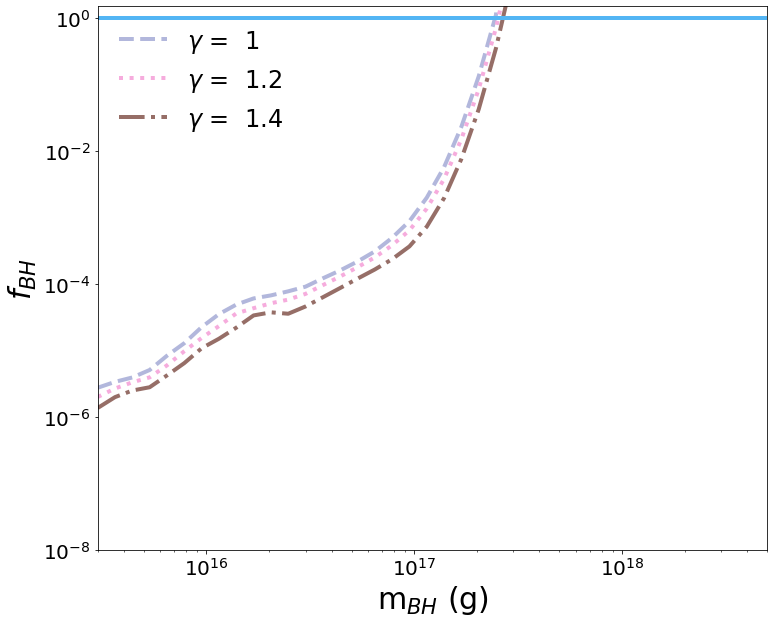

In [508]:
plt.close()
fig, ax = plt.subplots(figsize=(12, 10))
width = 4
plt.plot(gamma1_511[0], gamma1_511[1], color = lover_colors[4], label = r'$\gamma$ =  1', ls = '--', linewidth = width)
#plt.scatter(masses, fpbhs, color = 'black', label = r'$\gamma$ =  1.4', linewidth = width)

plt.plot(gamma12_511[0], gamma12_511[1], color = lover_colors[1], label = r'$\gamma$ =  1.2', ls = ':', linewidth = width)
#plt.plot(fingamma1m, fingamma1fbh, color = lover_colors[4], label = 'Gamma 1, PS not Floated', ls = '-.')
plt.plot(gamma14_511[0], gamma14_511[1], color = lover_colors[3], label = r'$\gamma$ =  1.4', ls = '-.', linewidth = width)

#plt.plot(constraintsmass, constraintsfbh, color = lover_colors[1], label = 'Constraints')
#plt.plot(existingmass, existingfbh, color = lover_colors[3], label = 'Existing')
#plt.plot(eastromass, eastrofbh, color = lover_colors[4], label = 'eastrogam')
plt.axhline(y = 1, color = lover_colors[2], linewidth = 4)
plt.yscale('log')
plt.xscale('log')
plt.xlim(3e15, 5e18)
plt.ylim(1e-8, 1.5e0)
plt.legend(loc = 'lower right')

ax.set_ylabel(r'$f_{BH}$', fontsize = axisfontsize)
ax.set_xlabel(r'm$_{BH}$ (g)', fontsize = axisfontsize)
leg = ax.legend(prop={'size': legendsize}, frameon=False, loc = 'upper left')
#leg = ax.legend(prop={'size': legendsize})
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
#plt.axvline(1.92e17, color = 'black')
plt.savefig('./paper_images/511_gamma_all_nofloat.pdf')
plt.show()
